# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:150%;font-style: Helvetica;text-align:center"><b></b>WHAT IF DOCTOR🧑‍⚕️ PREPARES AN AI MODEL??🤔</p></div>

In this notebook,lets explore our dataset with the nice visuals....

## <font color='#4287f5'>Importing necessary libraries...</font>

In [1]:
import pandas as pd                       # library for data manipulation (data cleaning,analysing...)
import numpy as np                        # library for numerical computation
import matplotlib.pyplot as plt           # library for data visualization which is built on NumPy arrays
%matplotlib inline
import seaborn as sns                     # library for data visualization built on top of matplotlib and 
                                          # closely integrated with pandas data structures in Python.

import random

import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

# Other libraries will be imported in the following steps as the process moves.... 

In [16]:
#Load the dataset which we have created previously......
df = pd.read_csv(r'D:\DSF\PROJECTPRO\MEDICAL_PROJECTS\2.HEMATOLOGICAL DISORDER(ANAEMIA)\real_corrected_anemia.csv')

In [17]:
df

ID  age  sex  Retic_count  Bilirubin_count  LDH_count  Coombs_test  \
0       0   61    0         1.21             0.50        154         1000   
1       1   51    1         1.77             0.75         54         1000   
2       2   32    0         5.68             0.60         82         1000   
3       3   35    0         3.86             0.85        341            5   
4       4   58    1         4.60             0.66        236         1000   
..    ...  ...  ...          ...              ...        ...          ...   
983   995   43    1         2.38             0.60        133         1000   
984   996   48    1         1.98             0.55         95         1000   
985   997   58    1         0.40             0.28        104         1000   
986   998   60    1         4.08             6.03        392            5   
987  1000   55    1         3.70             0.40         77         1000   

     Peripheral_Smear  Ferritin_level  Hb_electrophoresis  \
0                   8             165                1000   
1                   8             148                1000   
2                   8             139                1000   
3                   8             135                1000   
4                   8              38                1000   
..                ...             ...                 ...   
983                 9             103                1000   
984                 8             113                1000   
985                 7               2                1000   
986                 8             167                1000   
987                 8             114                1000   

     Other_blood_cell_count\(Pancytopenia +/-)  Serum_Creatinine  TSH_Level  \
0                                           14              0.68       3.50   
1                                           14              1.10       3.42   
2                                           15              0.94       3.50   
3                                           15              0.91       3.28   
4                                           15              1.10       1.25   
..                                         ...               ...        ...   
983                                         15              0.89       2.12   
984                                         14              0.90       0.85   
985                                         15              0.67       3.36   
986                                         15              0.93       4.33   
987                                         15              0.93       0.92   

     Serum_electrophoresis  Vit_B12_level  CLASS  
0                     1000            389     70  
1                     1000            678     70  
2                     1000            237     10  
3                     1000            327     20  
4                     1000            808     10  
..                     ...            ...    ...  
983                   1000            159    110  
984                   1000            782     70  
985                   1000            219     40  
986                   1000            683     20  
987                   1000            785     10  

[988 rows x 16 columns]

## <font color='#4287f5'>Lets start with the nice histograms...</font>

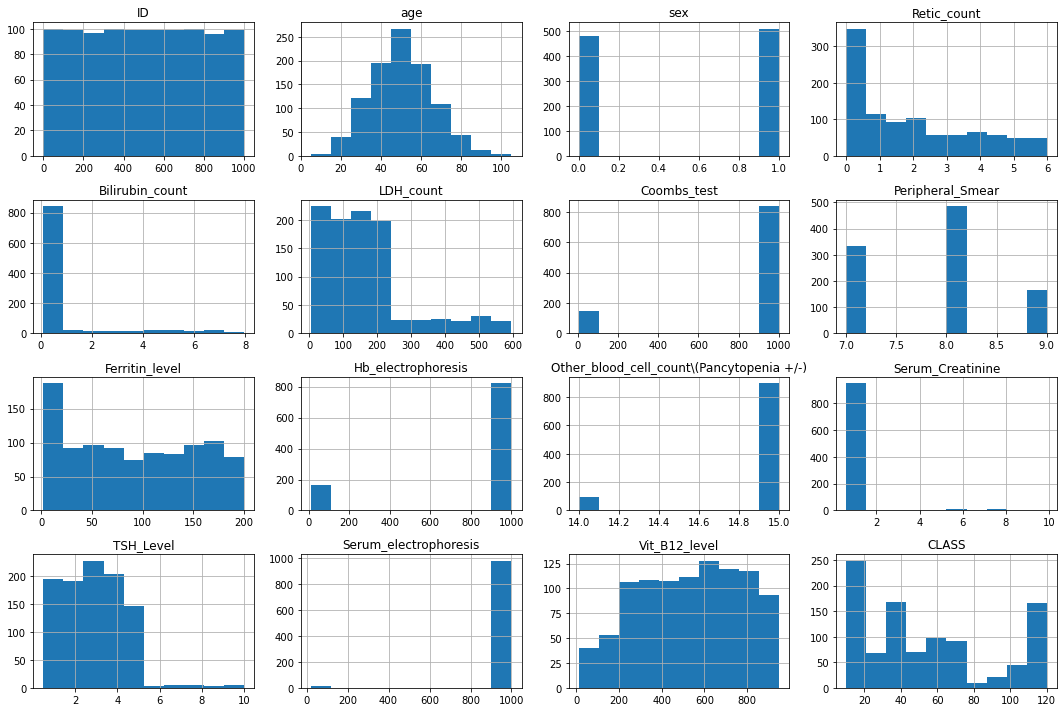

In [18]:
%matplotlib inline
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

* Among the continous features, except for the age, none of the feature values are normally distributed. Most of those are right skewed features. But, in this project, I am thinking of modelling Tree based models and therefore, I am not worried about the distribution of the values.
* There's also CLASS IMBALANCE problem but as I am more focused on the models like Decision Trees, I am not worried about this class imbalance problem

I am not satisfied with the above visuals. Lets try the same with seaborn library

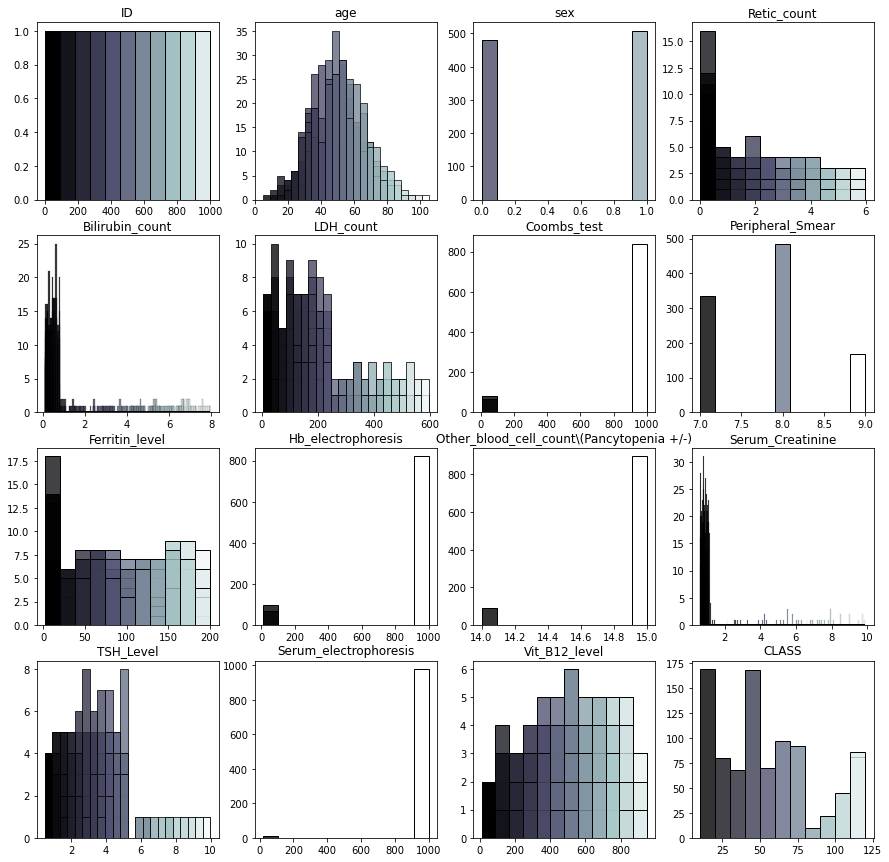

In [19]:
# Lets create histogram for each features.. 

# create a subplot of 4 x 4
data = df
plt.subplots(4,4,figsize=(15,15))


# Plot a histplot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(4,4,idx+1)
    sns.histplot(data, x = col, hue = col, legend=False, palette = 'bone',alpha=0.8)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(col)

plt.subplot(4,4,16).set_visible(True)
plt.show()

In [20]:
# Lets get the percentage of 'Outcome' class...

def get_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

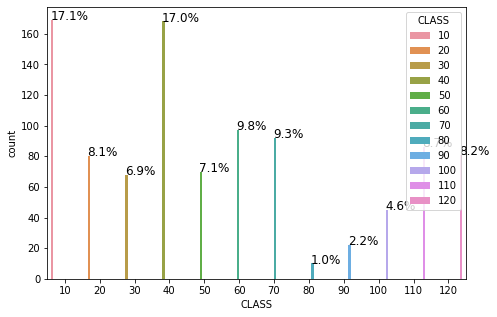

In [21]:
plt.figure(figsize=(7.5,5))
ax = sns.countplot(x='CLASS',data=df,hue = 'CLASS')
plt.xlabel('CLASS')
plt.ylabel('count')

get_percentage(ax,data.CLASS)

Our dataset contains more number of cases who have acute_or_chronic_blood_loss('10',17.1%).The very next to it comes the cases with iron_deficiency_anemia('40',17%) and so on. The least number of cases are of multiple_myeloma('80',1%)

###  Lets visualize the distribution of variables with <u>boxplot</u> to see the outliers..

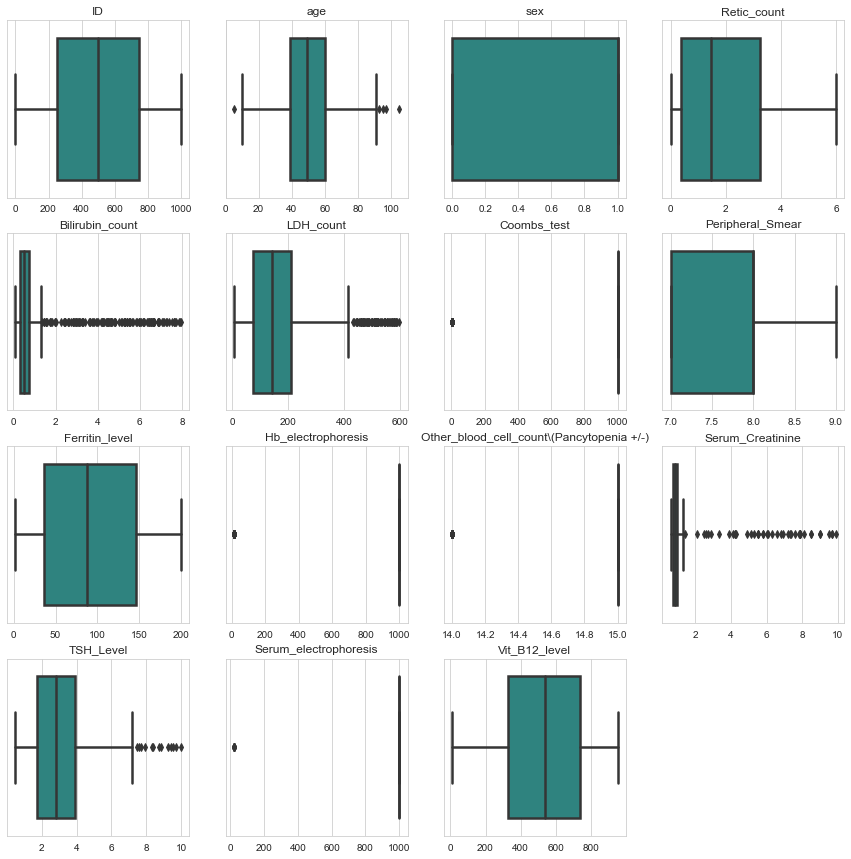

In [26]:
# create a subplot of 3 x 3
sns.set_style('whitegrid')
plt.subplots(4,4,figsize=(15,15))


# Plot a boxplot for each variable

for idx, col in enumerate(df.columns):
    ax = plt.subplot(4,4,idx+1)
    ax.yaxis.set_ticklabels([])

    sns.boxplot(x = col, data = df, hue = col, palette = 'viridis',linewidth=2.5)
    ax.set_xlabel(None)

    ax.set_title(col)
 
# Hide the 9th subplot (bottom right) since there are only 8 plots

plt.subplot(4,4,16).set_visible(False)
plt.show()

There are significant outliers present in the features like 'Bilirubin_count','LDH_count','Serum_Creatinine' and 'TSH_level'.
* What may be the reason for these?
* What are these outliers? 
* Should we drop these as we do the same in the non-medical projects?
* Will the significance of the dataset will be lost if we delete these outliers?

I would like to answer to the above questions here one by one...
* The very reason for the presence of these values is that they are indicating the true cases in this dataset.Like for example, if we observe the values of 'Serum_Creatinine' in the plot, the outliers shown, are all above the value of 2 which indicates there is some pathology in kidneys.
* In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.An outlier can cause serious problems in statistical analyses.
* I would like to emphasise the point that outliers should not be dropped in the datasets like this because it will loss its classifying prediction significance.


For the reasons mentioned above, I will proceed further without dropping the outliers

There are still various visualization plots which can be plotted but as of now,I think its more than enough for the above created hand made dataset.

### <font color='#4287f5'> Lets select the features now....</font>

For that, lets plot <u>**Pearson's Correlation Coefficient**</u>....
<br></br>
What does this coefficient signify?
* It is a measure of the strength of a linear association between two variables.
* It gives the measure of the strength of association between two variables.
* It takes a range of values from +1 to -1.
* A **value of 0** indicates that there is **no association** between the two variables. 
* A **value greater than 0** indicates a **positive association**; that is, as the value of one variable increases, so does the value of the other variable. 
* A **value less than 0** indicates a **negative association**; that is, as the value of one variable increases, the value of the other variable decreases.

<AxesSubplot:>

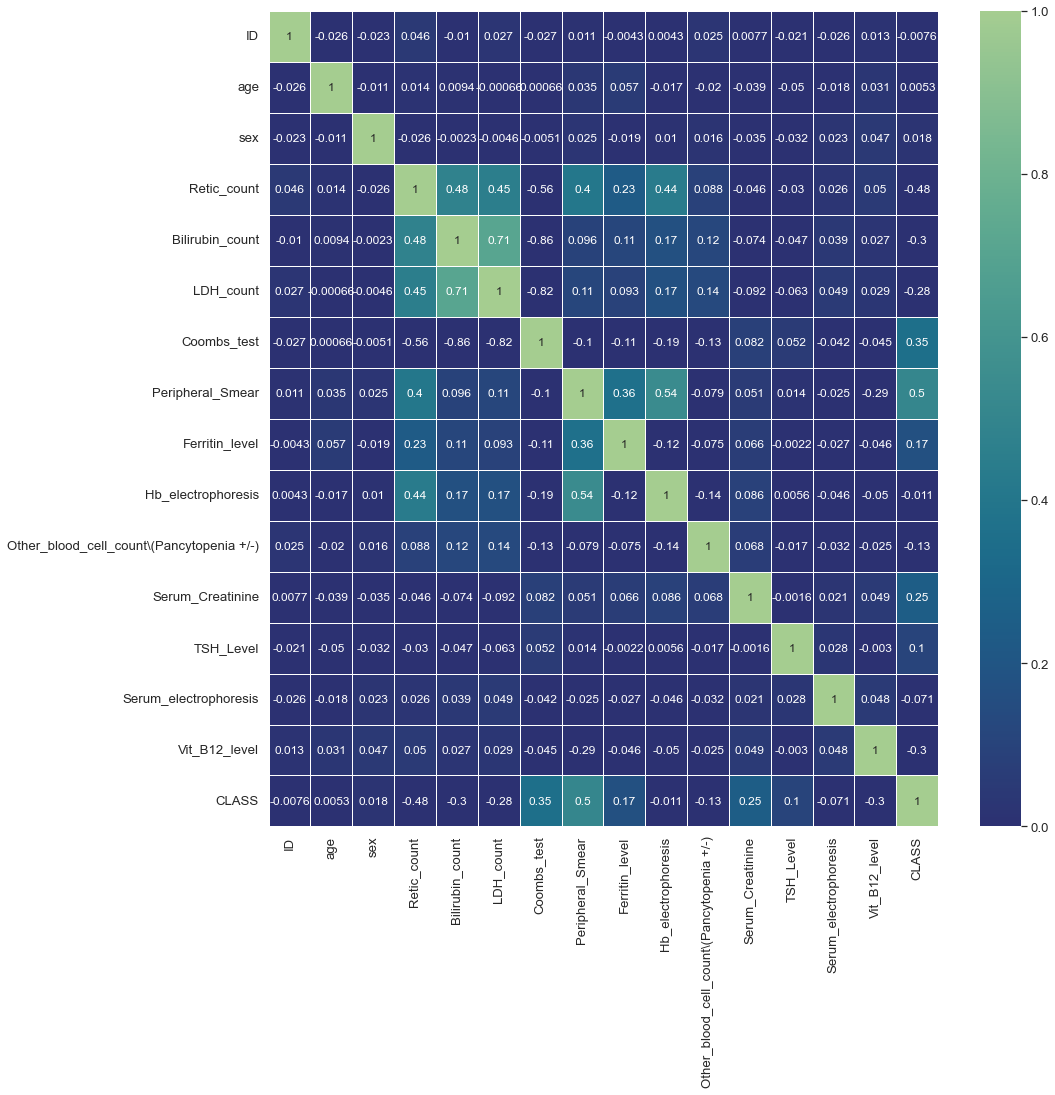

In [28]:
corr_matrix=df.corr()

plt.figure(figsize=(15,15))       # Size of whole plot

sns.set(font_scale= 1.2)         # Font size of labels 

sns.heatmap(corr_matrix, annot=True, cmap='crest_r',vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 12})


As per Pearson's correlation,
* 'Peripheral_smear','Coombs_test','Serum_Creatinine','Ferritin_level','TSH_level' are the most positively correlated features.
* 'Retic_count','Bilirubin_level','Vit_B12_level','LDH_count' are the most negatively correlated features.
Both the above set of features will contribute good to the model.

We can rank these features by another method named **'F-test'**.

* The F Test Formula is a Statistical Formula used to test the significance of differences between two groups of Data. It is often used in research studies to determine whether the difference in the means of two populations is Statistically significant.
                                        OR
* F test is a statistical test that is used in hypothesis testing to check whether the variances of two populations or two samples are equal or not
* In simple terms, lets say F-test value of a feature 'Glucose' is 0.5, it means that the model uses 0.5 amount of a feature value in determining its prediction.

In [30]:
target_name='CLASS'

y= df[target_name]              

X=df.drop(target_name,axis=1)   # dropping the Outcome column and keeping all other columns as X to be the features for the model

In [31]:
from sklearn.feature_selection import f_classif

In [32]:
[f_stat, f_p_value] = f_classif(X,y)

In [33]:
f_test_df = pd.DataFrame({'Feature': df.columns[:15] , 
                          'f_statistic': f_stat,
                          'p value':f_p_value})

In [34]:
f_test_df.sort_values('p value')

Feature  f_statistic        p value
3                                 Retic_count   555.063337   0.000000e+00
6                                 Coombs_test          inf   0.000000e+00
7                            Peripheral_Smear          inf   0.000000e+00
9                          Hb_electrophoresis          inf   0.000000e+00
10  Other_blood_cell_count\(Pancytopenia +/-)          inf   0.000000e+00
11                           Serum_Creatinine   340.098770   0.000000e+00
13                      Serum_electrophoresis          inf   0.000000e+00
4                             Bilirubin_count   250.525386  3.592798e-275
5                                   LDH_count   185.856858  1.612320e-230
8                              Ferritin_level    54.383939   1.544460e-93
14                              Vit_B12_level    39.196354   3.526480e-70
12                                  TSH_Level    29.960189   1.132086e-54
1                                         age     0.896662   5.431184e-01
2                                         sex     0.841451   5.983915e-01
0                                          ID     0.574311   8.507477e-01

The above ranked features as per F-test are pretty much good on comparison to the picture below. 

<!DOCTYPE html>
<html>
<body>

<h2 style= "text-align:center;color:#4A5154;font-size:120%;"><u> Approach to Classification for the Cause of Anaemia  </u></h2>
<img src="classified_anaemia.jpeg" alt="m" width="900" height="533">

</body>
</html>

This is it from the visualization side and lets model the AI in the next notebook...